# Perceptron

Answer all marked questions (❓).  

In [227]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Question 1

Consider the following linearly separable training set:

$\mathbf{x^{(1)}} =\begin{bmatrix} -1 \\ 0  \\ \end{bmatrix} $,  $\mathbf{x^{(2)}} =\begin{bmatrix} 0 \\ 0.25  \\ \end{bmatrix} $,   $\mathbf{x^{(3)}} =\begin{bmatrix} 1 \\ 1 \\ \end{bmatrix} $,      $\mathbf{x^{(4)}} =\begin{bmatrix} 1 \\ -1  \\ \end{bmatrix} $

$y^{(1)} = -1$, $y^{(2)} = +1$, $y^{(3)} = +1$, $y^{(4)} = -1$


In [228]:
# Define points
inputs = np.array([[-1, 0], [0, 0.25], [1, 1], [1, -1]])
labels = np.array([-1, 1, 1, -1])

num_examples, num_features = np.shape(inputs)

# Augment points with a dimension for the bias.
inputs = np.concatenate([np.ones((num_examples, 1)), inputs], axis=1)

print(np.shape(inputs))

(4, 3)


❓ Let us use the perceptron algorithm to separate the two classes of points.

1. Initialize all weights to zero (including the bias) 
2. Assume $sign(z) = +1$ iff $z ≥ 0$, and $−1$ if $z < 0$ 
3. Complete provided fucntion `perceptron_epoch` which performs one epoch of the perceptron algorithm
4. Use a learning rate of one
5. Apply algorithm until convergence 

Note: You can use provided function `plot_separation_line` to see the points and the separating hyperplane in each epoch

In [229]:
"""
Function to execute perceptron epoch. 

Receives inputs, labels, previous weights (w) and learning rate(eta)

Should output number of mistakes and new weights
"""

def perceptron_epoch(inputs, labels, w, eta):
    #TODO: done
    mistakes = 0
    
    for i in range(len(inputs)):
        z = np.dot(w, inputs[i])
        prediction = 1 if z >= 0 else -1
        if prediction != labels[i]:
            mistakes += 1
            w += eta * labels[i] * inputs[i]  
    
    print("Mistakes: ", mistakes)
    return mistakes, w


In [230]:
# Plot separation line associated with model w, along with the data.
def plot_separation_line(inputs, labels, w):
    # Plot data.
    plt.plot(inputs[labels == -1, 1], inputs[labels == -1, 2], "b.")
    plt.plot(inputs[labels == 1, 1], inputs[labels == 1, 2], "r.")
    # Plot model separation line.
    x1 = np.array([-2, 2])
    x2 = (-w[0] - w[1]*x1) / w[2]
    plt.plot(x1, x2, 'k--')
    plt.show()

Mistakes:  3


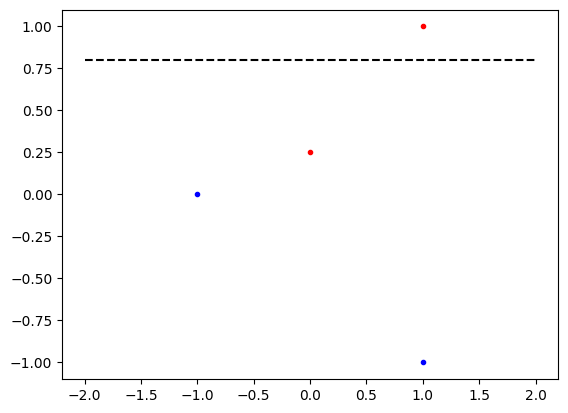

Mistakes:  1


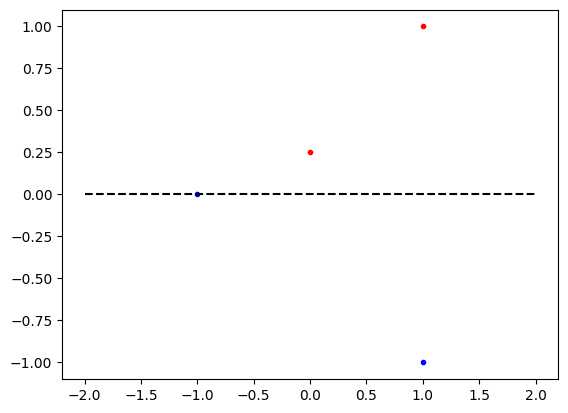

Mistakes:  2


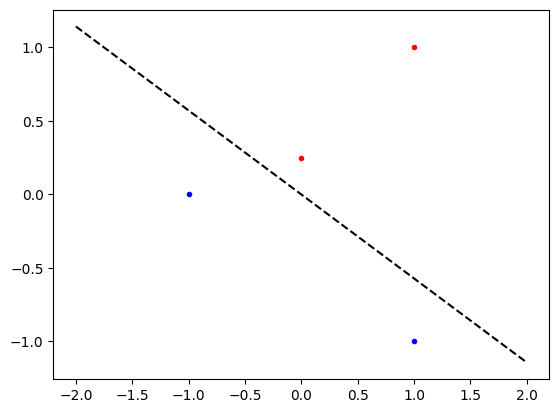

Mistakes:  0


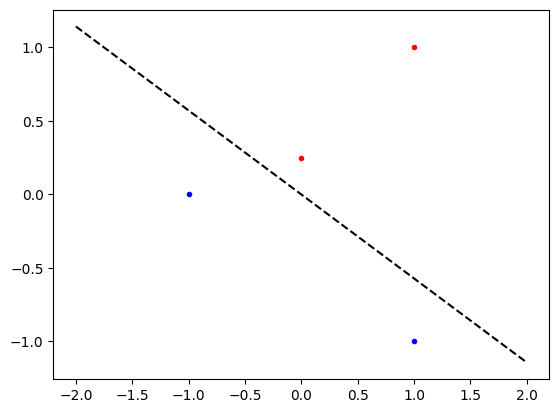

Converged after 4 epochs
Final weights: [0.   1.   1.75]


In [231]:
# TODO: done Inititalize weights and apply algorithm until convergence
w = np.zeros(inputs.shape[1])

# Learning rate
eta = 1

epochs = 0
while True:
    mistakes, w = perceptron_epoch(inputs, labels, w, eta)
    epochs += 1
    plot_separation_line(inputs, labels, w)
    if mistakes == 0:
        break

print(f"Converged after {epochs} epochs")
print("Final weights:", w)

❓ What is the perceptron output for query point $\begin{bmatrix} 0 && 1   \end{bmatrix}^T$?

In [232]:
# TODO: done

input = np.array([1, 0, 1])

z = np.dot(w, input)

y = 1 if z >= 0 else -1
print("Prediction for input", input, "is", y)

Prediction for input [1 0 1] is 1


❓ Change the initialization of weights and biases to be random with a standard normal distribution $\mathcal{N}(0,1)$. Try multiple times. Does it always converge?

*Hint:* `np.random.randn`

Mistakes:  2


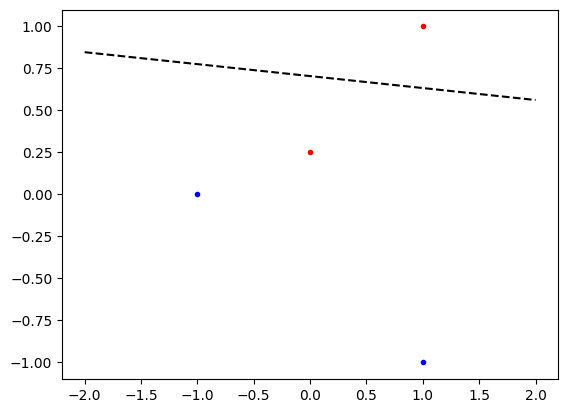

Mistakes:  1


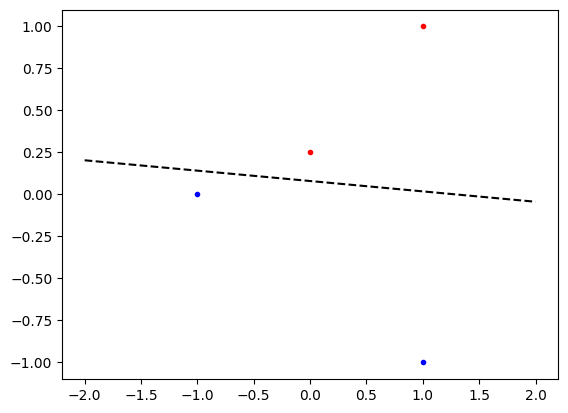

Mistakes:  0


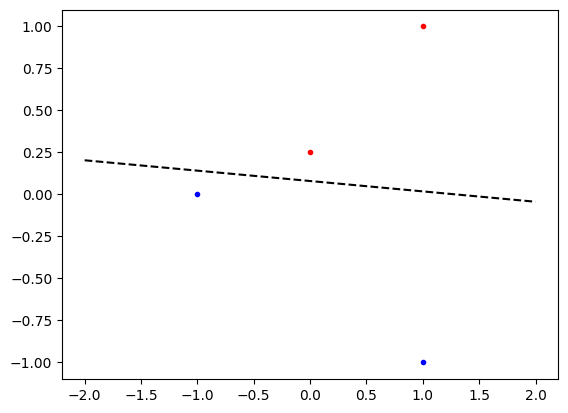

Converged after 3 epochs
Final weights: [-0.15091617  0.11621667  1.8832532 ]


In [233]:
# TODO: done

w = np.random.randn(inputs.shape[1])

# Learning rate
eta = 1

epochs = 0
while True:
    mistakes, w = perceptron_epoch(inputs, labels, w, eta)
    epochs += 1
    plot_separation_line(inputs, labels, w)
    if mistakes == 0:
        break

print(f"Converged after {epochs} epochs")
print("Final weights:", w)

## Question 2 

Let us generate a balanced dataset with 30 examples in $\mathbb{R}^2$ and 3 classes. 
Assume each of the 10 inputs associated to class $k \in \{0,1,2\}$ is generated as $x \sim \mathcal{N}(\mu_k, \sigma_k^2 I)$, with $\sigma_0=\sigma_1=\sigma_2 = 1$, 
$\mu_0 = [0, 0]^\top$, $\mu_1 = [0, 3]^\top$, and $\mu_2 = [2, 2]^\top$.

❓ Plot the data

In [234]:
inputs0 = np.array([0, 0]) + np.random.randn(10, 2)
inputs1 = np.array([0, 3]) + np.random.randn(10, 2)
inputs2 = np.array([2, 2]) + np.random.randn(10, 2)

inputs = np.concatenate([inputs0, inputs1, inputs2], axis=0)

labels = np.array([0]*10 + [1]*10 + [2]*10)

# Shuffling observations
ind = np.random.permutation(30)
inputs = inputs[ind, :]
labels = labels[ind]

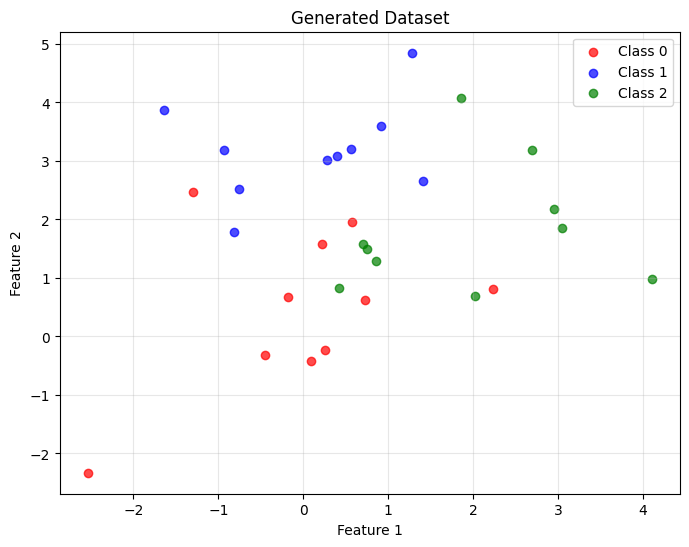

In [235]:
# TODO: done plot data

# Plot the data
plt.figure(figsize=(8, 6))
for i, color, label in zip(range(3), ['red', 'blue', 'green'], ['Class 0', 'Class 1', 'Class 2']):
    plt.scatter(inputs[labels == i, 0], inputs[labels == i, 1], color=color, label=label, alpha=0.7)

plt.title('Generated Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

❓ Implement the multi-class perceptron algorithm by completing the `multi_class_perceptron_epoch` function. 

❓ Complete function `multi_class_classify` so that it provides the predicted labels given the inputs and the weights.

❓ Create or import a function that computes accuracy given the arrays of predicted and correct labels.

❓ Run 100 iterations of the algorithm, initializing all the weights to zero and using a learning rate of one. Save the accuracy of each epoch in a list. 

❓ What is the training accuracy (fraction of points that are correctly classified)?

❓ Plot the accuracies over epochs.

Note: Don't forget you have to augment the `inputs` with a dimension for the bias!

In [236]:
#TODO: done
def multi_class_perceptron_epoch(inputs, labels, W, eta=1):
    """
    Perform one epoch of the multi-class perceptron algorithm.
    """
    mistakes = 0
    for x, y in zip(inputs, labels):
        x = x.reshape(-1, 1)
        y_pred = np.argmax(W @ x)
        if y_pred != y:
            mistakes += 1
            W[y, :] += eta * x.flatten()
            W[y_pred, :] -= eta * x.flatten()
    return W

In [237]:
#TODO: done
def multi_class_classify(inputs, W):
    """
    Classify inputs using the weight matrix W.
    """
    predictions = np.argmax(inputs @ W.T, axis=1)
    return predictions

In [238]:
# TODO: done function to compute accuracy
def compute_accuracy(y_true, y_pred):
    """
    Compute accuracy as the fraction of correctly classified points.
    """
    return np.mean(y_true == y_pred)

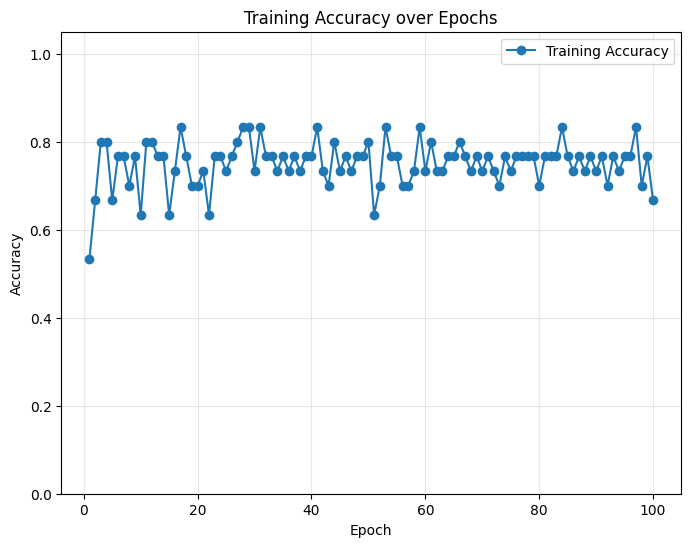

0.6666666666666666

In [239]:
# TODO: Run algorithm, compute final accuracies, plot accuracies over epochs

# Initialize parameters

inputs_augmented = np.hstack([inputs, np.ones((inputs.shape[0], 1))])

num_classes = 3
W = np.zeros((num_classes, inputs_augmented.shape[1]))  # Initialize weights to zero
eta = 1  # Learning rate
epochs = 100
accuracies = []

# Training loop
for epoch in range(epochs):
    W = multi_class_perceptron_epoch(inputs_augmented, labels, W, eta)
    predictions = multi_class_classify(inputs_augmented, W)
    accuracy = compute_accuracy(labels, predictions)
    accuracies.append(accuracy)

# Final training accuracy
final_training_accuracy = accuracies[-1]

# Plot accuracies over epochs
plt.figure(figsize=(8, 6))
plt.plot(range(1, epochs + 1), accuracies, marker='o', label="Training Accuracy")
plt.title("Training Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim(0, 1.05)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

final_training_accuracy

## Question 3

Now it's time to try the perceptron on real data and see what happens.  

Let's load the UCI handwritten digits dataset using `scikit-learn`

In [240]:
from sklearn.datasets import load_digits
data = load_digits()

In [241]:
X = data['data']
y = data['target']

In [242]:
num_examples, num_features = np.shape(X)
num_labels = np.max(y)+1  # labels are 0, 1, ..., num_labels-1

# Augment points with a dimension for the bias.
X = np.concatenate([np.ones((num_examples, 1)), X], axis=1)

This is a dataset containing $1797$ 8x8 input images of digits, each corresponding to one out of 10 output classes. 
You can print the dataset description with `print(data.DESCR)
` and visualize some input examples:

<Figure size 640x480 with 0 Axes>

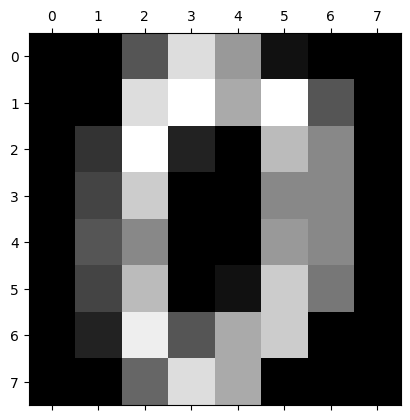

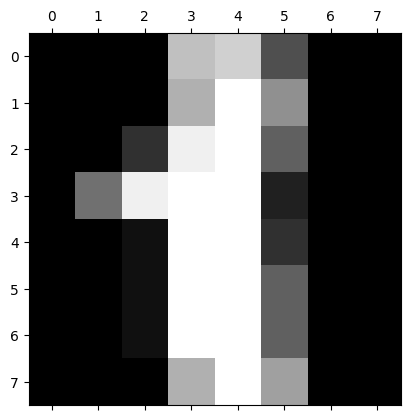

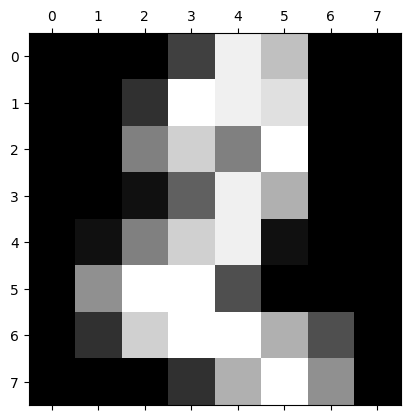

In [243]:
import matplotlib.pyplot as plt
plt.gray()
for i in range(3):
    plt.matshow(data.images[i])
plt.show()

We randomly split this data into training (80\%) and test (20\%) partitions. This can be done with:

In [244]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

❓ Run your implementation of the multi-class perceptron algorithm on this dataset. Measure the training and test accuracy. 

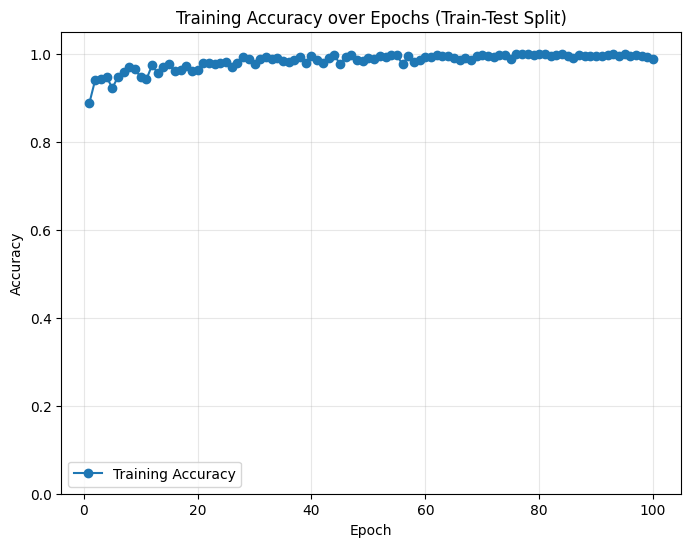

Final Training Accuracy: 0.99
Test Accuracy: 0.96


In [250]:
# TODO: done

# Initialize weights
W = np.zeros((num_labels, X_train.shape[1]))  # Weight matrix with zeros
eta = 1  # Learning rate
epochs = 100
train_accuracies = []

# Training loop
for epoch in range(epochs):
    W = multi_class_perceptron_epoch(X_train, y_train, W, eta)
    train_predictions = multi_class_classify(X_train, W)
    train_accuracy = compute_accuracy(y_train, train_predictions)
    train_accuracies.append(train_accuracy)

# Final training accuracy
final_training_accuracy = train_accuracies[-1]

# Measure test accuracy
test_predictions = multi_class_classify(X_test, W)
test_accuracy = compute_accuracy(y_test, test_predictions)

# Plot training accuracies over epochs
plt.figure(figsize=(8, 6))
plt.plot(range(1, epochs + 1), train_accuracies, marker='o', label="Training Accuracy")
plt.title("Training Accuracy over Epochs (Train-Test Split)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim(0, 1.05)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

# Print results
print(f"Final Training Accuracy: {final_training_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")


Let's use `scikit-learn`'s implementation of the perceptron algorithm. You can check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) to understand what hyperparameters they are using and why the performances are different

In [225]:
from sklearn.linear_model import Perceptron
clf = Perceptron(fit_intercept=False, shuffle=False)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.9735560194850382
0.9583333333333334
